In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
import pandas as pd
import numpy as np

In [7]:
path = 'heart.csv'
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


In [9]:
X = df[['cp', 'thalach', 'exang', 'oldpeak']]
Y = df["target"]

In [10]:
model = Sequential([
Dense(20, activation='relu', input_shape=(4,)),
Dense(10, activation='relu'),
Dense(1, activation='softmax')
])

/Users/irfanwani/Downloads/CAP450/code/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212, 4) (212,)
Test set: (91, 4) (91,)


In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5326 - loss: 16.6543 
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.5439 - loss: 0.7216
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5364 - loss: 0.6811 
Epoch 4/5


/Users/irfanwani/Downloads/CAP450/code/venv/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.5376 - loss: 0.6890
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5576 - loss: 0.6774 


In [14]:
training_accuracy = model.history.history['accuracy']
max(training_accuracy)

0.5377358198165894

In [15]:
training_loss = model.history.history['loss']
min(training_loss)

0.6810850501060486

In [16]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.5537 - loss: 0.6893


/Users/irfanwani/Downloads/CAP450/code/venv/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[0.6892656683921814, 0.5604395866394043]

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

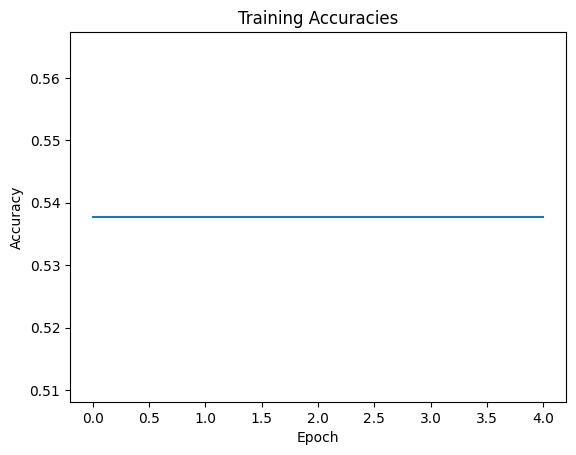

In [18]:
plt.plot(training_accuracy)
plt.title('Training Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

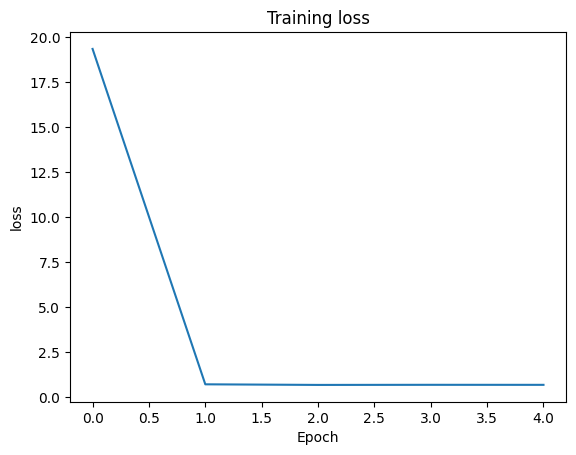

In [19]:
plt.plot(training_loss)
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

In [20]:
model.predict([[ 1,2,3,4]])

ValueError: Unrecognized data type: x=[[1, 2, 3, 4]] (of type <class 'list'>)

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#import libraries
import numpy as np
from flask import Flask, render_template,request
import pickle#Initialize the flask App
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
#default page of our web-app
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
#To use the predict button in our web-app
@app.route('/predict',methods=['POST'])
def predict():
    #For rendering results on HTML GUI
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2)
    return render_template('index.html', prediction_text='CO2    Emission of the vehicle is :{}'.format(output))

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
